# class Dataset
Вам необходимо знать, как писать собственный класс Dataset, ниже показано, как написать простейший его вариант.


In [1]:
from PIL import Image
from torchvision import transforms
from IPython.display import clear_output
import os
import torch
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!mkdir cats & wget -O './cats/1.jpg' 'https://hips.hearstapps.com/hmg-prod/images/domestic-cat-lies-in-a-basket-with-a-knitted-royalty-free-image-1592337336.jpg?crop=0.88889xw:1xh;center,top&resize=1200:*' 

In [ ]:
!wget -O './cats/2.jpg' 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSm8ErlMlPdnS5zbhJ2KL339H-cCsjrxjMl8A&usqp=CAU' 

In [ ]:
!wget -O './cats/3.jpg' 'https://static01.nyt.com/images/2022/11/29/science/00tb-cats1/00tb-cats1-mediumSquareAt3X.jpg'

In [ ]:
!wget -O './cats/4.jpg' 'https://cdn.shopify.com/s/files/1/1832/0821/files/catshark.jpg?v=1649869148'

In [ ]:
!wget -O './cats/5.jpg' 'https://nationaltoday.com/wp-content/uploads/2020/08/international-cat-day.jpg'

In [14]:
data_transforms = transforms.Compose([
        transforms.RandomResizedCrop(256),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation((-30,30)),
        transforms.RandomGrayscale(p=0.3),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

In [15]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [16]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, path_data, transforms):
        self.path_data = path_data
        self.image_paths = os.listdir(self.path_data)
        self.transforms = transforms


    def __len__(self):
        return len(self.image_paths)


    def __getitem__(self, idx):
        image = Image.open(os.path.join(self.path_data, self.image_paths[idx]))
        image = self.transforms(image)
        return torch.FloatTensor(image)

train_data = Dataset('/content/cats', transforms=data_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=2, shuffle=True)

In [19]:
imgs = next(iter(train_loader))

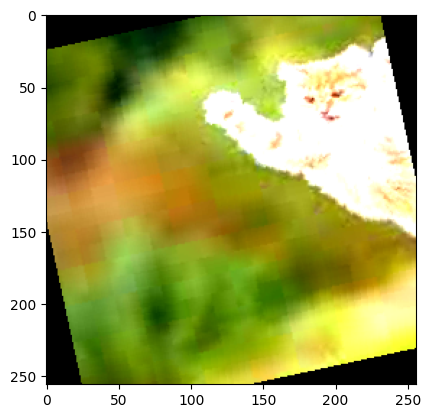

In [20]:
imshow(imgs[0])

В таком виде даталоадер можно использовать для тренировки модели

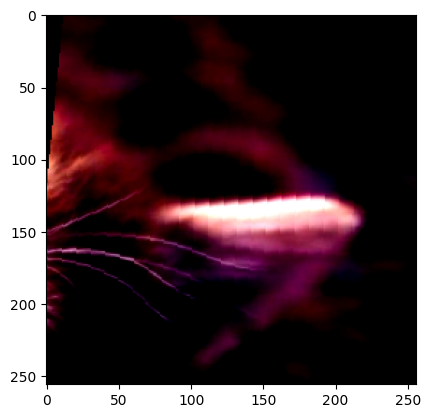

In [21]:
import time
epoch_counts = 5
for epoch in range(epoch_counts):
    for img in train_loader:
        imshow(img[0])
        time.sleep(2)
        clear_output(True)


# Задание

Вам необходимо написать класс Dataset, который возвращает пары (изображение, его категория). Изображения нужно использовать из папки cats, которую мы использовали до этого, а категории нужно взять из csv файла. В csv файле две колонки, filename - имя изображения и category - его категория.

In [43]:
import csv

filenames = os.listdir('./cats')
cats_dict = {f: 'cat' for f in filenames}
print(cats_dict)

with open('cats.csv', 'w') as f:
    w = csv.writer(f)
    w.writerows(cats_dict.items())

{'3.jpg': 'cat', '2.jpg': 'cat', '4.jpg': 'cat', '5.jpg': 'cat', '1.jpg': 'cat'}


In [44]:
test_transforms = transforms.Compose([
        transforms.CenterCrop(256),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, image_folder_path, category_path, transforms):
        self.image_folder_path = image_folder_path
        self.image_paths = os.listdir(self.image_folder_path)
        self.category_path = category_path
        self.transforms = transforms

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(os.path.join(self.image_folder_path, self.image_paths[idx]))
        image = self.transforms(image)
        category = 
        return (torch.FloatTensor(image), torch.tensor(category))


train_data = Dataset('/content/cats', 'cats_categories.csv', transforms=test_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=5, shuffle=True)

In [ ]:
imgs, cats = next(iter(train_loader))

In [ ]:
def test(imgs, cats):
    image3 = Image.open('/content/cats/3.jpeg')
    image3 = test_transforms(image3)
    image1 = Image.open('/content/cats/1.jpeg')
    image1 = test_transforms(image1)
    assert imgs.size() == torch.Size([5, 3, 256, 256])
    assert (list(set(cats.numpy())) == np.array([0,1,2,3,4])).all()
    assert np.isclose(imgs[np.where(cats.numpy() == 0)[0][0]].numpy(), image3.numpy()).all()
    assert np.isclose(imgs[np.where(cats.numpy() == 4)[0][0]].numpy(), image1.numpy()).all()
    print('Успешно')



In [ ]:
test(imgs, cats)

Задание считается выполненным, когда у вас прошел тест. Удачи:)